<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/Transient_Impedance_FirstOrderRC_variableTimeScale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Transient Impedance: Example with First-Order RC Circuit</h1></b>

Dr. Bingsen Wang

10/13/2024
</center>

#Introduction

In most of the datasheets of power switching devices, the plots of transient thermal impedance can be found close the end of them. Although the concept transient thermal impedance has been used for decades, the impedance that tied to time (tranisent) is not straight forward to most electrical engineers since the impedance is a concept in frequency domain. In electrical engineering, the impedance is plotted aginst frequency instead of time. A first-order RC circuit is utilized to explain the seemingly conuter-intuitive concept of the transient impedance.

#Response of First-Order RC to Step Input

At $t=0$, the input current steps from 0 to $I$, the differential equation that describe the first-order system is
$$C\frac{dv}{dt} +\frac{v}{R}=I \tag{1}$$
where $v$ is the voltage across the capacitance.

The solution to (1) is
$$v = (v_0 - IR)e^{-t/\tau} + IR\tag{2}$$
where $v_0 = v(0)$ is the initial capacitor voltage at $t=0$. $\tau = RC$ is the time constant.

#Response of First-Order RC to Repetitive Pulse Input

The repetitive pulse input features the duty ratio $D$, the period $T$ and the amplitide $I$. Without loss of generality, the pulse with the width $DT$ is positioned at the beginning of each period. It is further assumed that the capacitor voltage at the beginning and the end of the pulse is $v_0$ and $v_1$, respectively.

With reference to (2), the capacitor voltage at the end of the pulse interval $[0,DT]$ is
$$v_1 = (v_0 - IR)e^{-DT/\tau} + IR\tag{3}$$

At the end of each period, the capacitor voltage is equal to the initial voltage at the beginning of each period. Hence,
$$v_0 = v_1e^{-(1-D)T/\tau} \tag{4}$$

Substituting (4) into (3) yields
$$v_1 = IR\frac{1 - e^{-DT/\tau}}{1 - e^{-T/\tau}} \tag{5}$$

#Transident Impedance



Let the transient impedance be
$$Z = \frac{v_1}{I}\tag{6}$$

Substituting (5) into (6) yields
$$Z = \frac{1+e^{-DT/\tau}}{1+e^{-T/\tau}}R$$

It can be observed that the transient impedance is a function of the duty ratio and the period of the input pulses for a given RC combination. Since in most datasheets, the transient impedance is typically plotted against the pulse width for various duty ratios.

Let the pulse width $t_p$ be defined as
$$t_p = DT \tag{7}$$

Then (6) can be rewritten as
$$Z = \frac{1 - e^{-t_p/\tau}}{1 - e^{-t_p/(D\tau)}}R \tag{8}$$

Let the normalized impedance $Z'$ and the normalized pulse width $t_p'$ be
$$\begin{align}
Z' &= \frac{Z}{R}\\
t_p' &= \frac{t_p}{\tau}
\end{align}
\tag{9}$$

Then, the normalized impedance is
$$Z' = \frac{1 - e^{-t_p'}}{1 - e^{-t_p'/D}} \tag{10}$$

#Python Code
The Python code illustrates the normalized transient impedance vs normalized pulse width.

0
0
31
62
93
124
155
186
217
248
279
0


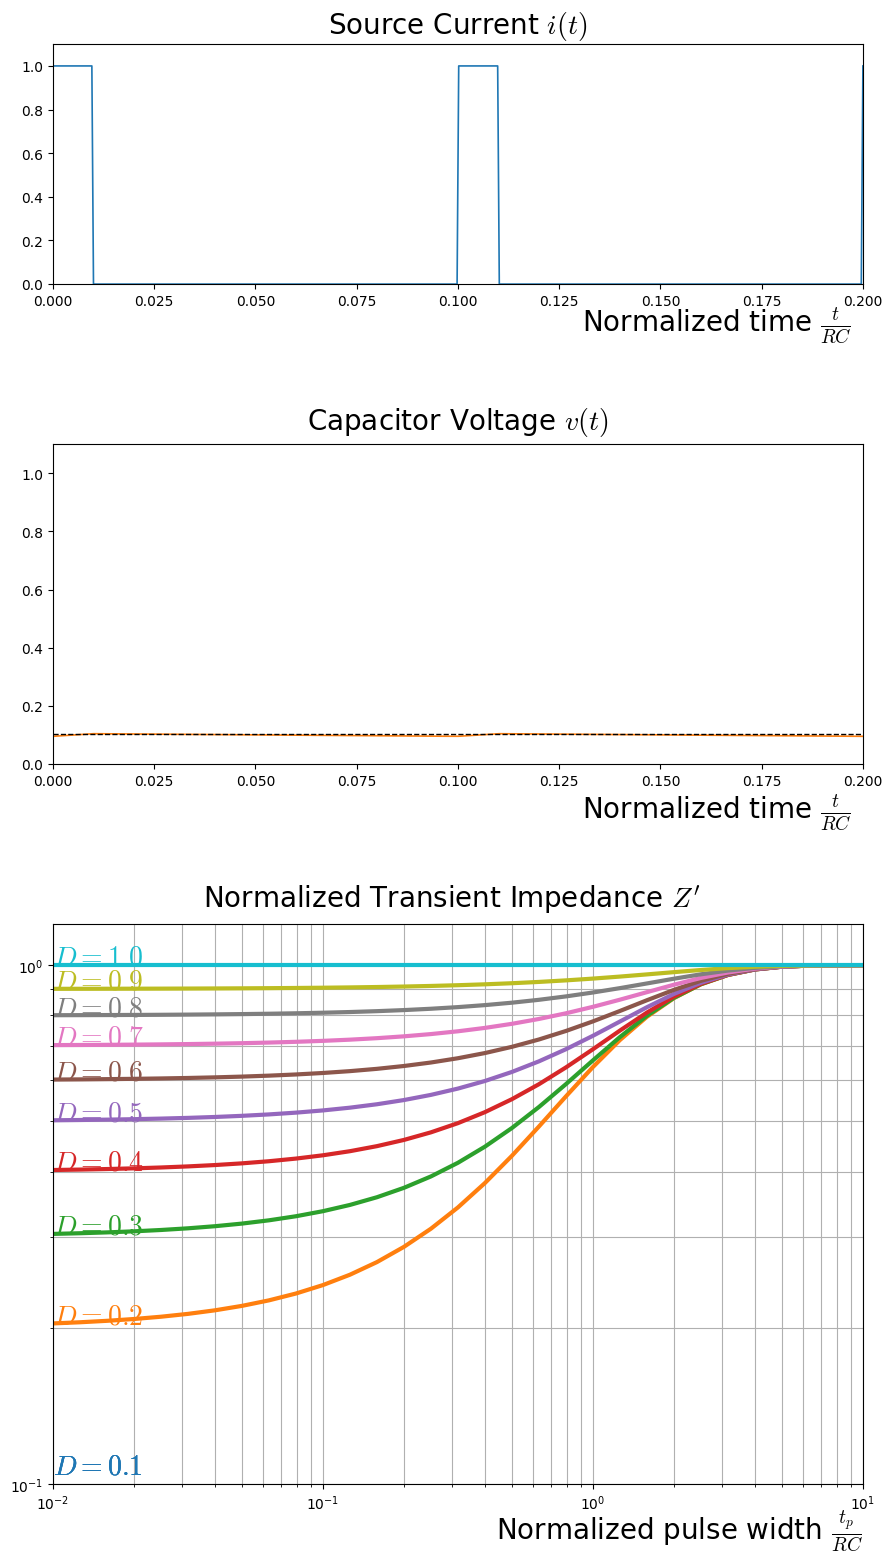

In [52]:
from os import linesep
import numpy as np
from numpy import linspace,logspace,cos,sin,pi,exp,heaviside
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
plt.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})

def vc_on(t,v0):
  return (v0-1)*exp(-t) + 1

def vc_off(t,v1,D,T):
  return v1*exp(-(t-D*T))

def vc(t,v0,v1,D,T):
  return vc_on(t%T,v0)*heaviside(D-(t%T)/T,1) + vc_off(t%T,v1,D,T)*heaviside(-D+(t%T)/T,1)

def i_s(t,D,T): #source current
  return heaviside(D-(t%T)/T,1)

def Z_tr(tp,D):
  return (1-exp(-tp))/(1-exp(-tp/D))

def draw_axis(ax,xy0,xylabel):
  xn,xm=ax.get_xlim()
  yn,ym=ax.get_ylim()
  x0,y0 = xy0
  ax.annotate("", (xm, y0), (xn, y0),arrowprops={'arrowstyle':"->"}) #x-axis
  ax.annotate("", (x0,ym), (x0,yn),arrowprops={'arrowstyle':"->"}) #y-axis
  ax.text(xm,y0,xylabel[0],size=18,va='top',ha='right') #x-axis label
  ax.text(x0,ym,xylabel[1],size=18,va='top') #y-axis label
  return

#parameters
D = linspace(0.1,1,10)
t=linspace(0,1,500)
tp = logspace(-2,1,31) #pulse width

fig = plt.figure(figsize=(9,16))
fig.tight_layout()
clst=list(mpl.cm.tab10.colors) #colors of lines
ax_lst,lines=[],[]
ax1=fig.add_axes([.05,.8,.9,.15],xlim=[0,50],ylim=[0,1.1])
ax2=fig.add_axes([.05,.5,.9,.2],xlim=[0,50],ylim=[0,1.1])
title_ax1 = ax1.text(0,1.2,'Source Current $i(t)$',size=20,ha='center')
xlabel_ax1 = ax1.text(0,0,r'Normalized time $\frac{t}{RC}$  ',size=20, ha='right',va='top')
title_ax2 = ax2.text(0,1.2,'Capacitor Voltage $v(t)$',size=20,ha='center')
xlabel_ax2 = ax2.text(0,0,r'Normalized time $\frac{t}{RC}$  ',size=20, ha='right',va='top')
ax3=fig.add_axes([.05,.05,.9,.35],xlim=[.01,10],ylim=[.1,1.2],xscale='log',yscale='log')
ax3.text(10,.09,r'Normalized pulse width $\frac{t_p}{RC}$',va='top',ha='right',size=20)
ax3.text(.3,1.3,'Normalized Transient Impedance $Z\'$',ha='center',size=20)

# draw_axis(ax1,(0,0),['$t$  ',' Source current $i(t)$'])
# draw_axis(ax2,(0,0),['$t$  ',' Capacitor voltage $v(t)$'])
ax3.grid(True,'both')
line_i=ax1.plot([], [], color=clst[0], lw=1.2)[0] #source current
line_v = ax2.plot([], [], color=clst[1], lw=1.2)[0] #capacitor voltage
line_v_dot =ax2.plot([], [], '--k', lw=1)[0] #capacitor voltage
lines_z = []
for k in range(len(D)):
  lines_z.append(ax3.plot([], [], color=clst[k], lw=3)[0]) #transient impedance

def animate(ii):
  # ii=len(tp)*2+9
  i = ii%len(tp) #i-th pulse width
  k = int(ii/len(tp)) #k-th duty ratio
  if i==0:
    print(ii) #for monitoring
    ax3.text(tp[0],Z_tr(tp[0],D[k]),f'$D={D[k]:.1f}$',size=20,color=clst[k])
  T = tp[i]/D[k]
  t1 = t*2*T
  ax1.set_xlim(0,2*T), ax2.set_xlim(0,2*T)
  v1 = (1-exp(-D[k]*T))/(1-exp(-T))
  title_ax1.set_position((T,1.15))
  title_ax2.set_position((T,1.15))
  xlabel_ax1.set_position((2*T,-.1))
  xlabel_ax2.set_position((2*T,-.1))

  v0 = v1*exp(-(1-D[k])*T)
  line_i.set_data(t1,i_s(t1,D[k],T))
  line_v.set_data(t1,vc(t1,v0,v1,D[k],T))
  line_v_dot.set_data(t1,v1+t1*0)
  lines_z[k].set_data(tp[:i+1],Z_tr(tp[:i+1],D[k]))
  return

anim = animation.FuncAnimation(fig, animate, interval=100, frames=len(tp)*len(D))
# anim #uncomment to generate animation in the output area
anim.save("TransientImpedance_variableTimeScale.mp4", writer=animation.FFMpegWriter(fps=10), dpi = 200)